<a href="https://colab.research.google.com/github/HARSHITA-VERMA-2147249/MACHINE-LEARNING/blob/main/2147249_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOGISTIC REGRESSION

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/supermarket_sales - Sheet1.csv", encoding= 'unicode_escape')
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [4]:
df.rename(columns = {'Invoice ID':'new_col'}, inplace = True)

In [5]:
from sklearn.preprocessing import LabelEncoder
labelEn = LabelEncoder()
df['Gender'] = labelEn.fit_transform(df['Gender'])
df['Branch'] = labelEn.fit_transform(df['Branch'])
df['Customer type'] = labelEn.fit_transform(df['Customer type'])
df['Payment'] = labelEn.fit_transform(df['Payment'])

In [6]:
df['Unit price'] = df['Unit price'].astype('int')
df['Tax 5%'] = df['Tax 5%'].astype('int')
df['Total'] = df['Total'].astype('int')
df['gross margin percentage'] = df['gross margin percentage'].astype('int')
df['cogs'] = df['cogs'].astype('int')
df['gross income'] = df['gross income'].astype('int')
df['Rating'] = df['Rating'].astype('int')

In [7]:
#split dataset in features and target variable
feature_cols = ['Branch', 'Customer type', 'Unit price', 'Quantity','Tax 5%','Total','Payment','gross margin percentage','gross income','Rating']
X = df[feature_cols] # Features
y = df.Gender # Target variable

In [8]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [9]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [10]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[79, 43],
       [79, 49]])

Text(0.5, 257.44, 'Predicted label')

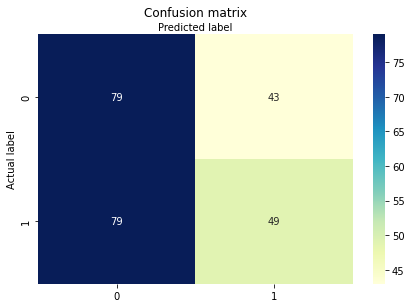

In [11]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [12]:
from sklearn.metrics import classification_report
target_names = ['male', 'female']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        male       0.50      0.65      0.56       122
      female       0.53      0.38      0.45       128

    accuracy                           0.51       250
   macro avg       0.52      0.52      0.50       250
weighted avg       0.52      0.51      0.50       250



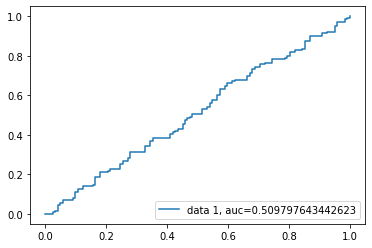

In [13]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# DECISION TREE

In [14]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [16]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.492


In [17]:
pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


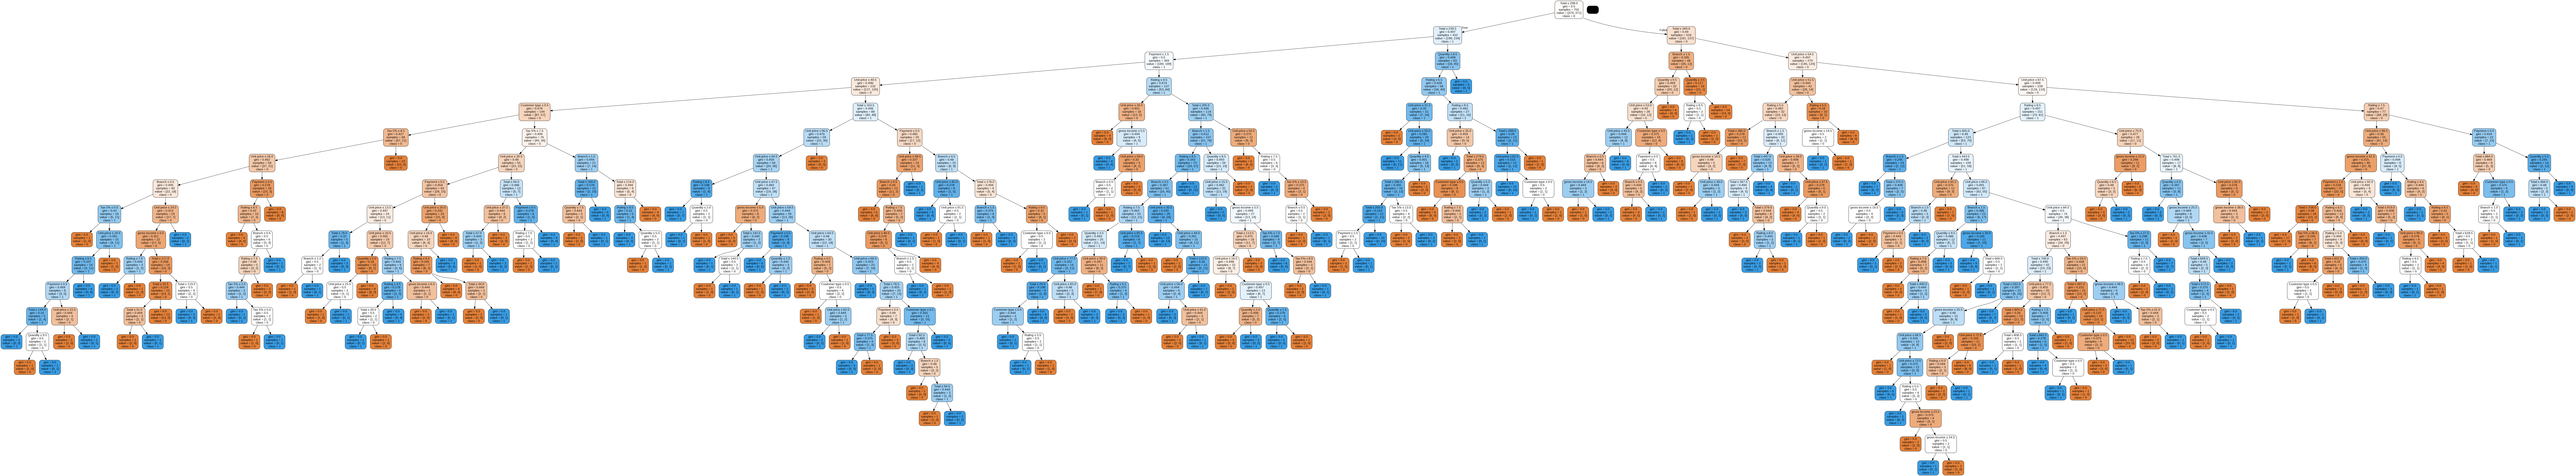

In [18]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('sales.png')
Image(graph.create_png())


# GIVEN DATASET

In [19]:
df = pd.read_csv("/content/hcvdat0.csv", encoding= 'unicode_escape')
df.head()

Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7

In [20]:
from sklearn.preprocessing import LabelEncoder
labelEn = LabelEncoder()
df['Category'] = labelEn.fit_transform(df['Category'])
df['Sex'] = labelEn.fit_transform(df['Sex'])
df

Unnamed: 0  Category  Age  Sex   ALB    ALP    ALT    AST   BIL    CHE  \
0             1         0   32    1  38.5   52.5    7.7   22.1   7.5   6.93   
1             2         0   32    1  38.5   70.3   18.0   24.7   3.9  11.17   
2             3         0   32    1  46.9   74.7   36.2   52.6   6.1   8.84   
3             4         0   32    1  43.2   52.0   30.6   22.6  18.9   7.33   
4             5         0   32    1  39.2   74.1   32.6   24.8   9.6   9.15   
..          ...       ...  ...  ...   ...    ...    ...    ...   ...    ...   
610         611         4   62    0  32.0  416.6    5.9  110.3  50.0   5.57   
611         612         4   64    0  24.0  102.8    2.9   44.4  20.0   1.54   
612         613         4   64    0  29.0   87.3    3.5   99.0  48.0   1.66   
613         614         4   46    0  33.0    NaN   39.0   62.0  20.0   3.56   
614         615         4   59    0  36.0    NaN  100.0   80.0  12.0   9.07   

     CHOL   CREA    GGT  PROT  
0    3.23  106.0   12.1  69.0  
1    4.80   74.0   15.6  76.5  
2    5.20   86.0   33.2  79.3  
3    4.74   80.0   33.8  75.7  
4    4.32   76.0   29.9  68.7  
..    ...    ...    ...   ...  
610  6.30   55.7  650.9  68.5  
611  3.02   63.0   35.9  71.3  
612  3.63   66.7   64.2  82.0  
613  4.20   52.0   50.0  71.0  
614  5.30   67.0   34.0  68.0  

[615 rows x 14 columns]

In [23]:
df1 = df.drop('Unnamed: 0',axis=1)

In [27]:
#split dataset in features and target variable
feature_cols = ['ALP', 'ALT','AST']
X = df1[feature_cols] # Features
y = df1.Age # Target variable

In [28]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [29]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

ValueError: ignored